In [7]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

Oppgave 1

In [9]:
def x_d(p,T):
    return 500-3.2*(p+T)
def x_s(p,t):
    return -100+4.3*(p-t)

In [10]:
# definer symboler i sympy

x,p,t,T=sp.symbols('x p t T', positive=True, real=True)

# betingelse for likevekt

eq_cond=sp.Eq(x_d(p,T),x_s(p,t))
eq_cond

Eq(-3.2*T - 3.2*p + 500, 4.3*p - 4.3*t - 100)

In [14]:
# løs for p
p_eq=sp.solve(eq_cond,p)
p_eq[0]

-0.426666666666667*T + 0.573333333333333*t + 80.0

In [15]:
# finn tilsvarende kvantum
x_eq=x_s(p_eq[0],t)
x_eq

-1.83466666666667*T - 1.83466666666667*t + 244.0

In [16]:
# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)

-0.426666666666667*T + 0.573333333333333*t + 80.0

In [18]:
# Likevektskvantum som funksjon av t og T

x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

x_eq_fn(t,T)

-1.83466666666667*T - 1.83466666666667*t + 244.0

In [19]:
# Kvantum omsatt med avgift på selger på t=0
x_eq_fn(0,0)

244.0

In [20]:
x_kons = round(x_eq_fn(0,0),2)
x_kons

244.0

In [21]:
# prisen som konsumenten må betale er
p_kons = round(p_eq_fn(0,0),2)
p_kons

80.0

In [22]:
# prisen som produsenten får er
p_kons -4

76.0

Oppgave 2

In [23]:
#Konsumentoverskudd
Konsumentoverskudd = sp.integrate(x_d(p,0) - float(p_kons), (p,0,x_kons))
Konsumentoverskudd

7222.39999999999

In [24]:
#Konsumentoverskudd med avgift
Konsumentoverskudd_t = sp.integrate(x_d(p,4) - float(p_kons), (p,0,x_kons))
Konsumentoverskudd_t

4099.20000000000

In [25]:
#Produsentoverskudd
Produsentoverskudd = sp.integrate(x_s(p,0) - p_kons,(p,0,x_kons))
Produsentoverskudd

84082.4000000000

In [27]:
#Produsentoverskudd med avgift
Produsentoverskudd_t = sp.integrate(x_s(p,4)-p_kons,(p,0,x_kons))
Produsentoverskudd_t

79885.6000000000

In [31]:
#Avgiftprovony
def avgiftprov(t):
    return t*x_eq_fn(t,0)
avgiftprov(t)

t*(244.0 - 1.83466666666667*t)

Oppgave 3

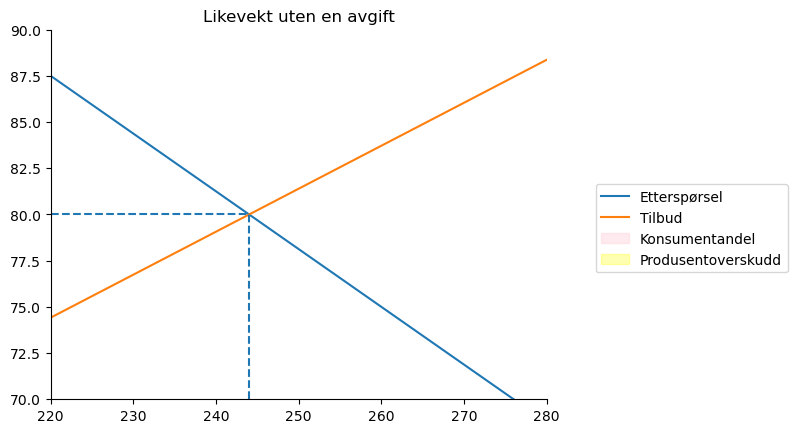

In [53]:
p_num=np.linspace(0.1,100,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set(xlim=(220,280))
                ax.set(ylim=(70,90))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')
ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.vlines(x_eq_fn(0,0),70, p_kons, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0,0),220,x_eq_fn(0,0), linestyles='dashed', clip_on=False)


ax.fill_between(p_num,float(p_kons),x_d(p_num,0), color = "pink",alpha = 0.3,label='Konsumentandel')

ax.fill_between(p_num,x_s(p_num,0),float(x_eq_fn(0,0)), color = "yellow", alpha = 0.3, label = "Produsentoverskudd")

# tittel
ax.set_title('Likevekt uten en avgift')

#vis navnene utenfor plottet:

ax.legend(bbox_to_anchor=(1.5,0.6));

Oppgave 4

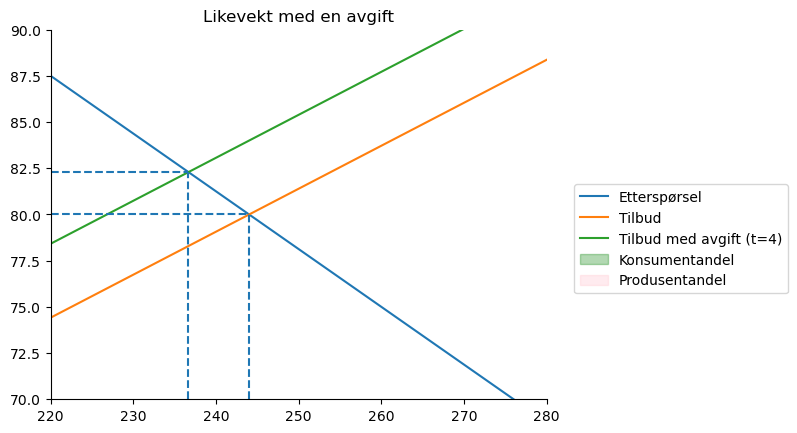

In [45]:
p_num=np.linspace(0.1,100,100)

#lag en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set(xlim=(220,280))
                ax.set(ylim=(70,90))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num, 0),p_num, label='Etterspørsel')
ax.plot(x_s(p_num, 0),p_num, label='Tilbud')
ax.plot(x_s(p_num, 4),p_num, label='Tilbud med avgift (t=4)')


ax.vlines(x_eq_fn(0,0),70, p_kons, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0,0),220,x_eq_fn(0,0), linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fn(4,0),70, p_eq_fn(4,0), linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(4,0),220,x_eq_fn(4,0), linestyles='dashed', clip_on=False)

ax.fill_between(p_num,x_d(p_num,0), color = "green",alpha = 0.3,label='Konsumentandel')
ax.fill_between(p_num,p_kons,p_kons-4, color = "pink",alpha = 0.3,label='Produsentandel')

# tittel
ax.set_title('Likevekt med en avgift')

#vis navnene utenfor plottet:

ax.legend(bbox_to_anchor=(1.5,0.6));

Oppgave 5

In [26]:
from IPython.display import Markdown

tbl=f"""
|                     | Før avgift     | Etter avgift    |Endring(etter avgift-før avgift)  |
| :-------------------| :--------------| :---------------| :-------------------------------|
| Konsumentpris       | ${np.round(float(x_eq_fn(0,0)),2)}$   | ${np.round(float(x_eq_fn(0,4)),2)}$ | ${np.round(float(x_eq_fn(0,4) - x_eq_fn(0,0)),2)}$  |
| Produsentpris       | ${np.round(float(p_eq_fn(0,0)),2)}$   | ${np.round(float(p_eq_fn(0,4)),2)}$ | ${np.round(float(p_eq_fn(0,4) - p_eq_fn(0,0)),2)}$   |
| Kvantum             | ${np.round(float(x_d(0,0)),2)}$  | ${np.round(float(x_d(0,4)),2)}$   | ${np.round(float(x_d(0,4)-x_d(0,0)),2)}$ |
| Konsumentoverskudd: | ${np.round(float(Konsumentoverskudd),2)}$ | ${np.round(float(Konsumentoverskudd_t),2)}$ | ${np.round(float(Konsumentoverskudd_t-Konsumentoverskudd),2)}$ |
| Produsentoverskudd: | ${np.round(float(Produsentoverskudd),2)}$ | ${np.round(float(Produsentoverskudd_t),2)}$ | ${np.round(float(Produsentoverskudd_t-Produsentoverskudd),2)}$  |
 | ${np.round(float(Konsumentoverskudd_t + producer_surplus_t),2)}$ | ${np.round(float((Konsumentoverskudd_t + producer_surplus_t) - (Konsumentoverskudd + producer_surplus)),2)}$    |
| Skatteprovent       | $0$                                 |                                       |                                                        |
| Dødvektstap         | $0$                                 |                                       |                                                        |
"""
display(Markdown(tbl))



|                     | Før avgift     | Etter avgift    |Endring(etter avgift-før avgift)  |
| :-------------------| :--------------| :---------------| :-------------------------------|
| Konsumentpris       | $244.0$   | $236.66$ | $-7.34$  |
| Produsentpris       | $80.0$   | $78.29$ | $-1.71$   |
| Kvantum             | $500.0$  | $487.2$   | $-12.8$ |
| Konsumentoverskudd: | $7222.4$ | $4099.2$ | $-3123.2$ |
| Produsentoverskudd: | $84082.4$ | $79885.6$ | $-4196.8$  |
| KO + PO :           | $91304.8$ | $83984.8$ | $-7320.0$    |
| Skatteprovent       | $0$                                 |                                       |                                                        |
| Dødvektstap         | $0$                                 |                                       |                                                        |
